In [36]:
pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install paho-mqtt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/home/pedro/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


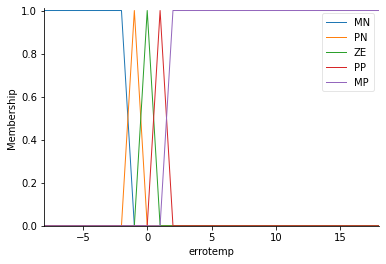

In [38]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

mqttBroker ="test.mosquitto.org"
client = mqtt.Client("c213Inatelsbm")
client.connect(mqttBroker)

# New Antecedent/Consequent objects hold universe variables and membership
# functions
errotemp = ctrl.Antecedent(np.arange(-8, 19, 1), 'errotemp')
varerrotemp =ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'varerrotemp')
aquecedor =ctrl.Consequent(np.arange(0, 100, 1), 'aquecedor')


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -2,-1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-2,-1,0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe,[1, 2, 18,18])
# You can see how these look with .view()
errotemp.view()

/home/pedro/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


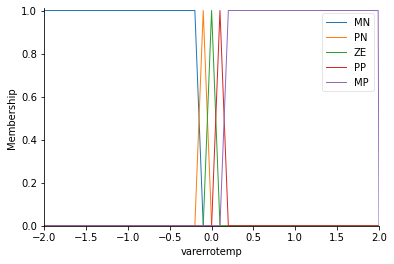

In [39]:
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-2, -2, -0.2,-0.1])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 2,2])
# You can see how these look with .view()
varerrotemp.view()

/home/pedro/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


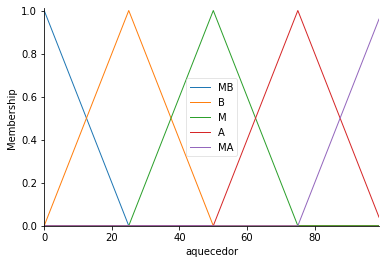

In [40]:
aquecedor['MB'] = fuzz.trimf(aquecedor.universe, [0,0,25])
aquecedor['B'] = fuzz.trimf(aquecedor.universe, [0,25,50])
aquecedor['M'] = fuzz.trimf(aquecedor.universe, [25, 50, 75])
aquecedor['A'] = fuzz.trimf(aquecedor.universe, [50, 75, 100])
aquecedor['MA'] = fuzz.trimf(aquecedor.universe, [75, 100, 100])
aquecedor.view()

In [41]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], aquecedor['MA'])
regra2 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], aquecedor['MA'])
regra3 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], aquecedor['A'])
regra4 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], aquecedor['A'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], aquecedor['M'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], aquecedor['MA'])
regra7 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], aquecedor['M'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], aquecedor['M'])
regra9 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], aquecedor['M'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], aquecedor['B'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], aquecedor['MA'])
regra12 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], aquecedor['M'])
regra13 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], aquecedor['M'])
regra14 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], aquecedor['M'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], aquecedor['B'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['PP'], aquecedor['M'])
regra17 = ctrl.Rule(errotemp['PN']& varerrotemp['PP'], aquecedor['M'])
regra18 = ctrl.Rule(errotemp['ZE']& varerrotemp['PP'], aquecedor['M'])
regra19 = ctrl.Rule(errotemp['PP']& varerrotemp['PP'], aquecedor['B'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], aquecedor['MB'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], aquecedor['M'])
regra22 = ctrl.Rule(errotemp['PN']& varerrotemp['MP'], aquecedor['B'])
regra23 = ctrl.Rule(errotemp['ZE']& varerrotemp['MP'], aquecedor['B'])
regra24 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], aquecedor['MB'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], aquecedor['MB'])

In [42]:
aquecedor_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(aquecedor_ctrl)

In [43]:
sp=5
tempatual=7
print(tempatual)
erroatual=0
while True: 
  erroanterior=erroatual
  erroatual=tempatual-sp
  varerroTemp=erroatual-erroanterior
  potencia.input['errotemp'] =erroatual
  potencia.input['varerrotemp'] =varerroTemp
  potencia.compute()
  i=0
  while (i < 10):
    tempatual=tempatual * 0.9952 + potencia.output['aquecedor'] * 0.0003963
    time.sleep(1)
    i += 1
  print(tempatual)
  client.publish("Aquecedor/Temperatura", tempatual)
  client.publish("Aquecedor/erro", erroatual)

7
6.7196465503208875
6.628558715772165
6.4525134034261455
6.365446541555069
6.222453179133239
6.140056553570678
6.028021918259549
5.949886048693344
5.86430634546648
5.7827468652044525
5.705018752465167
5.6309420235478065
5.560345149730714
5.493064660087247
5.42894476295989
5.367836985216156
5.309599828450904
5.254098441339044
5.201204307379908
5.150794947310251
5.1027536354968195
5.056969129651753
5.01333541324497
4.971751450017099
4.932120950024482
4.894352146674534
4.858357584235184
4.824053915326327
4.79136170792441
4.76020526143323
4.73051243139506
4.702214462436204
4.675245829060165
4.6495440839197775
4.625049713216945
4.601705998895191
4.579458887305887
4.558256864044075
4.538050834664037
